<a href="https://colab.research.google.com/github/AmandaInTech/diabetes-prediction-models/blob/main/CDC_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Diabetes Prediction Project**

**Overview:** This project is based on a CDC diabetes health indicator dataset that contains healthcare statistics and lifestyle survey information about people along with their diagnosis of diabetes.

**The objective:** To design a model to accurately predict if a person will develop diabetes given certain risk factors.

**Type of Machine Learning applied:** Supervised learning; Classification

In [1]:
#install ucimlrepo
!pip install ucimlrepo

In [2]:
#import pandas. Mount your drive. Load dataset and check the metadata.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)
print('---------------------------------------------------------')
# variable information
print(cdc_diabetes_health_indicators.variables)

Mounted at /content/drive
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_va

# **Target and Features**
**Our target variable (y)** is the binary and categorical variable for classification of whether a patient has diabetes or pre-diabetic = 1, or no diabetes = 0, contained in the ['Diabetes_binary'] column.

**Input features (X)** The dataset has 21 features;
- 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
- 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
- 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
- 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
- 'Income'

**Task** - Classification using Logistic Regression

**Justification for our target** - The outcome variable (target) is binary and categorical, with two classes (0 = no diabetes, 1 = prediabetes or diabetes).



In [3]:
# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)
print('---------------------------------------------------------')
# variable information
print(cdc_diabetes_health_indicators.variables)



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
# Combine features and targets into one DataFrame
df = pd.concat([X, y], axis=1)

# Save to CSV
df.to_csv('cdc_diabetes_health_indicators.csv', index=False)  # index=False prevents writing row numbers

# Read the CSV file into a DataFrame
df_loaded = pd.read_csv('cdc_diabetes_health_indicators.csv')
df_loaded.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [5]:
#Get the overview of the dataset
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [6]:
df_loaded.tail()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0
253679,1,1,1,25,0,0,1,1,1,0,...,0,2,0,0,0,0,9,6,2,1


In [7]:
#Column names
df_loaded.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

# Data Dictionary
The dataset has 21 features. Descriptions and example values are contained in these slides: https://docs.google.com/presentation/d/1-C7bsQzBBz8QE09JaXflHfOmazaPGnUMw_6Z5ZD7-a4/edit?usp=sharing

## **Data Cleaning**

In [8]:
#Check for null values
df_loaded.isna().sum()


,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [9]:
#Check for number of duplicates
print(f' This dataset contains {df_loaded.duplicated().sum()} duplicate entries')

 This dataset contains 24206 duplicate entries


In [10]:
#Slice the dataframe to show duplicates
sliced = df_loaded[df_loaded.duplicated()]
sliced

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1242,1,1,1,27,1,0,0,0,0,1,...,0,5,0,30,1,0,10,4,5,1
1563,0,0,1,21,1,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
2700,0,0,1,32,0,0,0,1,1,1,...,0,2,0,0,0,0,5,6,8,0
3160,0,0,1,21,0,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
3332,0,0,1,24,0,0,0,1,1,1,...,0,1,0,0,0,1,9,6,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1,1,1,33,0,0,0,1,1,1,...,0,3,0,0,0,1,9,6,6,1
253550,0,0,1,25,0,0,0,1,1,1,...,0,1,0,0,0,0,7,6,8,0
253563,0,1,1,24,1,0,0,1,1,1,...,0,2,0,0,0,1,8,6,8,0
253597,0,0,1,24,0,0,0,1,1,1,...,0,2,0,0,0,0,5,6,8,0


In [11]:
#Check the new makeup of the dataset
df_cleaned = df_loaded.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                229474 non-null  int64
 1   HighChol              229474 non-null  int64
 2   CholCheck             229474 non-null  int64
 3   BMI                   229474 non-null  int64
 4   Smoker                229474 non-null  int64
 5   Stroke                229474 non-null  int64
 6   HeartDiseaseorAttack  229474 non-null  int64
 7   PhysActivity          229474 non-null  int64
 8   Fruits                229474 non-null  int64
 9   Veggies               229474 non-null  int64
 10  HvyAlcoholConsump     229474 non-null  int64
 11  AnyHealthcare         229474 non-null  int64
 12  NoDocbcCost           229474 non-null  int64
 13  GenHlth               229474 non-null  int64
 14  MentHlth              229474 non-null  int64
 15  PhysHlth              229474 non-null  

In [12]:
#Crosscheck that no duplicates are left
print(f' This dataset contains {df_cleaned.duplicated().sum()} duplicate entries')

 This dataset contains 0 duplicate entries


In [13]:
df_cleaned.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [14]:
df_cleaned.shape

(229474, 22)

**Summary Statistics**

In [15]:
#Get summary statistics of your dataframe
df_cleaned.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,0.794587,...,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615,0.152945
std,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,0.404004,...,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888,0.359936
min,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


# **Data Visualization**

**Group columns as Numerical vs Binary**




In [16]:
numerical_cols = ['BMI','GenHlth','MentHlth','PhysHlth','Age', 'Education', 'Income']     # numerical values columns
binary_cols = df_cleaned.columns.difference(numerical_cols + ['Diabetes_binary']) # Binary columns

**Numerical columns distribution**


Distribution for numerical columns:

Column: BMI
count    229474.000000
mean         28.687507
std           6.789204
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64


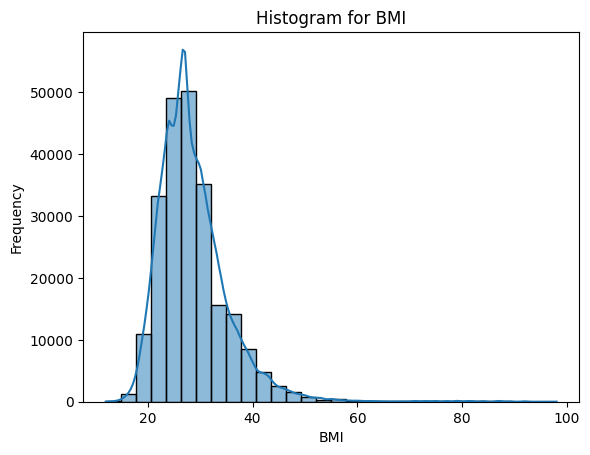


Column: GenHlth
count    229474.000000
mean          2.601820
std           1.064962
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64


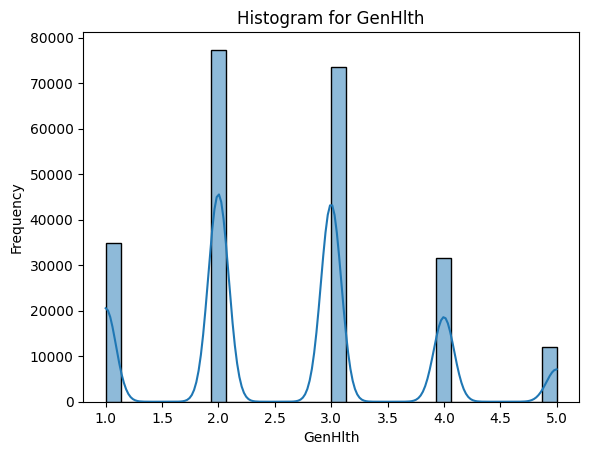


Column: MentHlth
count    229474.000000
mean          3.509866
std           7.717643
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64


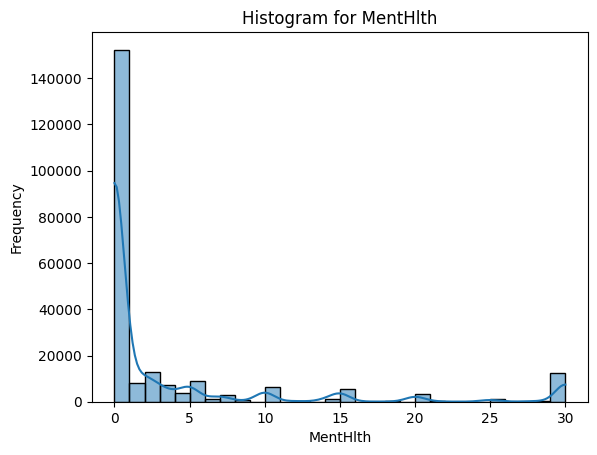


Column: PhysHlth
count    229474.000000
mean          4.681219
std           9.050877
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysHlth, dtype: float64


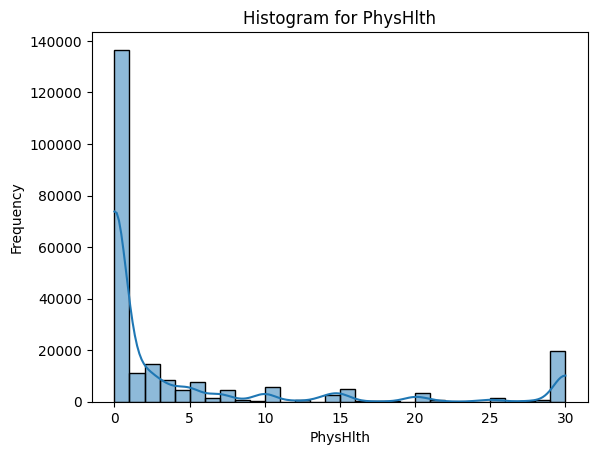


Column: Age
count    229474.000000
mean          8.085068
std           3.094451
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64


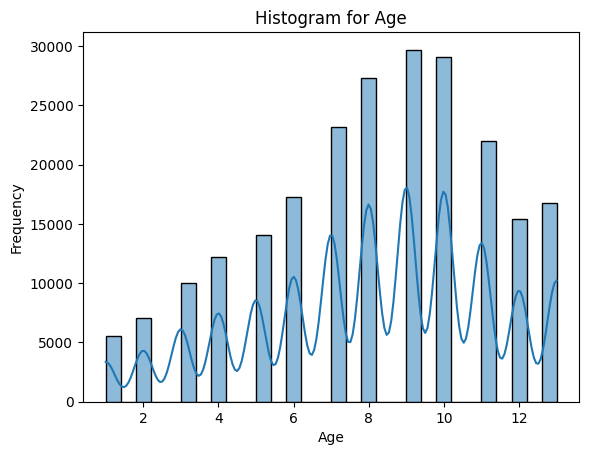


Column: Education
count    229474.000000
mean          4.979741
std           0.992989
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64


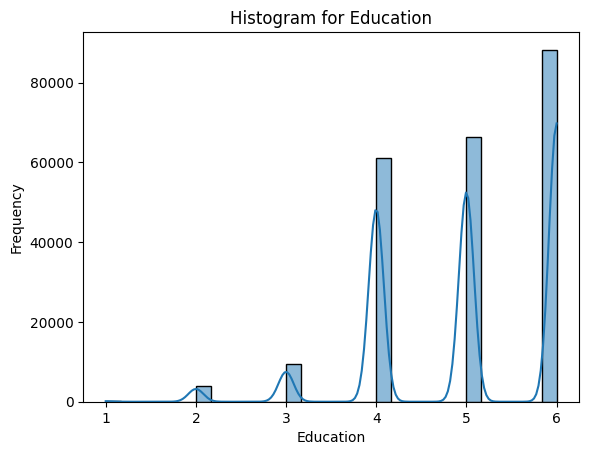


Column: Income
count    229474.000000
mean          5.888615
std           2.092888
min           1.000000
25%           4.000000
50%           6.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64


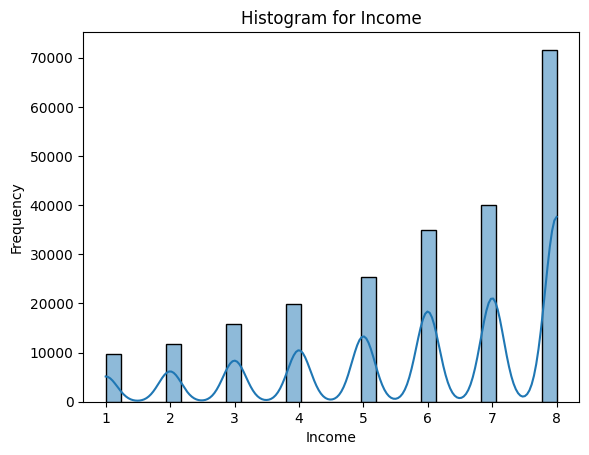

In [17]:
#Histograms for all numeric variables

print("\nDistribution for numerical columns:")
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(df_cleaned[col].describe())
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

 **Binary columns distribution - with countplot**


Column: AnyHealthcare
AnyHealthcare
1    217085
0     12389
Name: count, dtype: int64


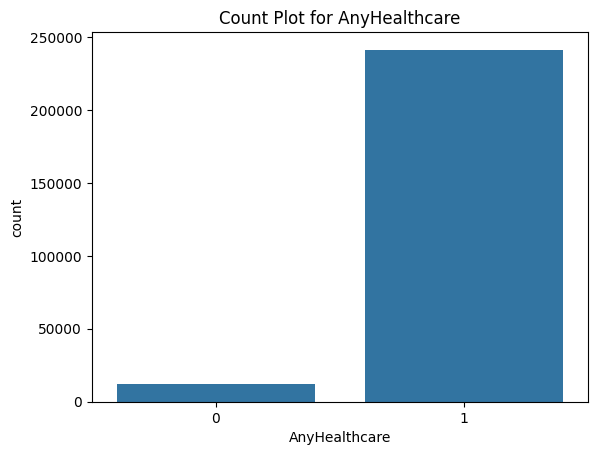


Column: CholCheck
CholCheck
1    220176
0      9298
Name: count, dtype: int64


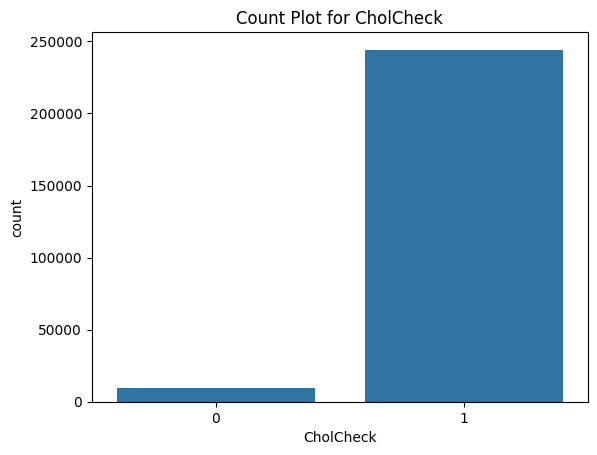


Column: DiffWalk
DiffWalk
0    186849
1     42625
Name: count, dtype: int64


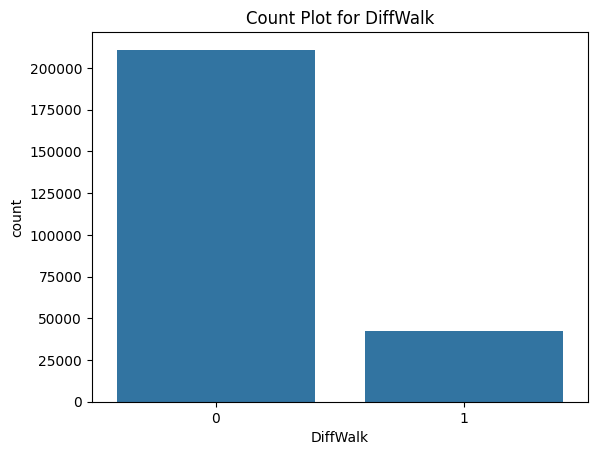


Column: Fruits
Fruits
1    140593
0     88881
Name: count, dtype: int64


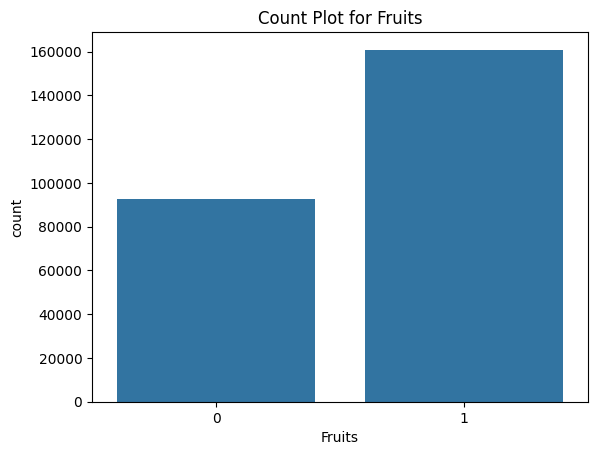


Column: HeartDiseaseorAttack
HeartDiseaseorAttack
0    205761
1     23713
Name: count, dtype: int64


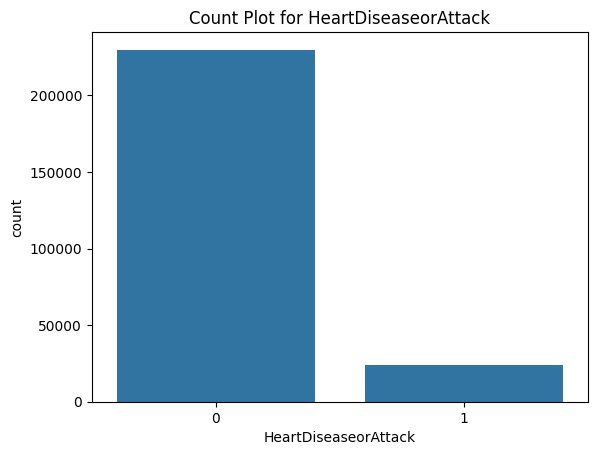


Column: HighBP
HighBP
0    125214
1    104260
Name: count, dtype: int64


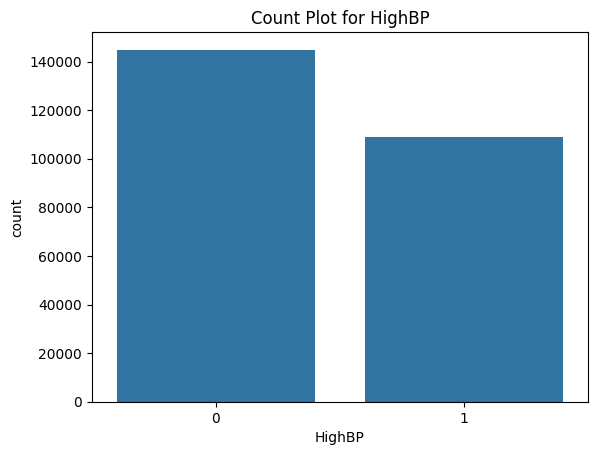


Column: HighChol
HighChol
0    128129
1    101345
Name: count, dtype: int64


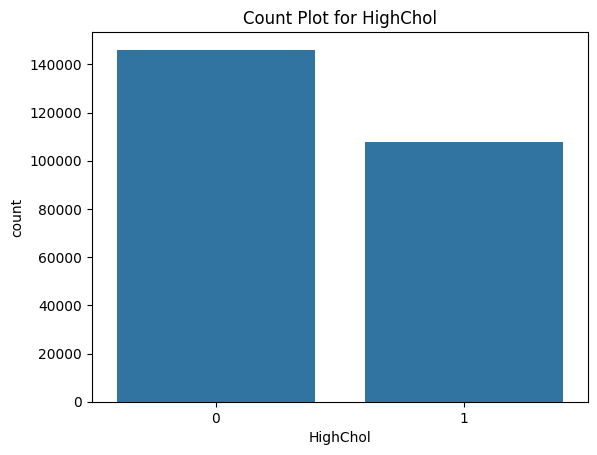


Column: HvyAlcoholConsump
HvyAlcoholConsump
0    215524
1     13950
Name: count, dtype: int64


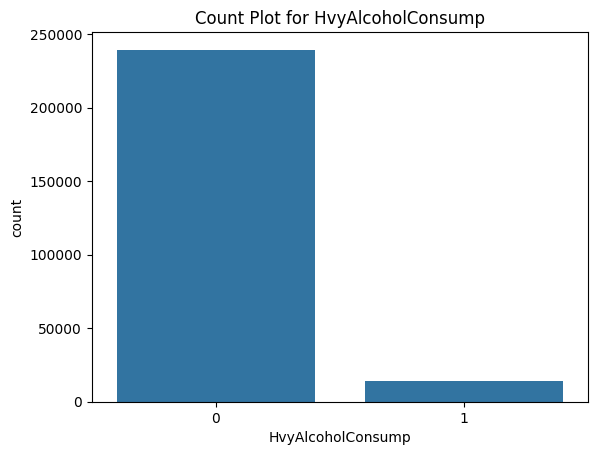


Column: NoDocbcCost
NoDocbcCost
0    208151
1     21323
Name: count, dtype: int64


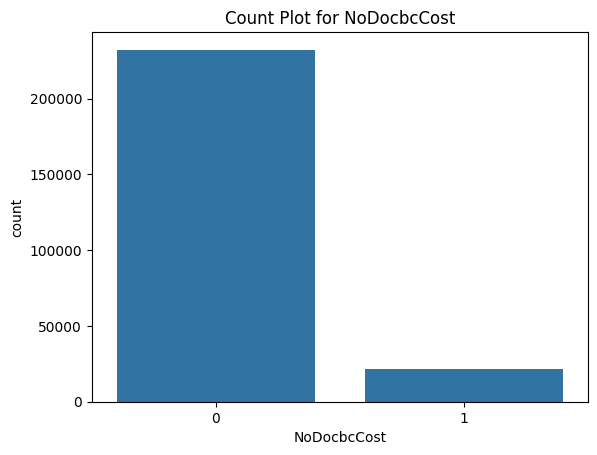


Column: PhysActivity
PhysActivity
1    168214
0     61260
Name: count, dtype: int64


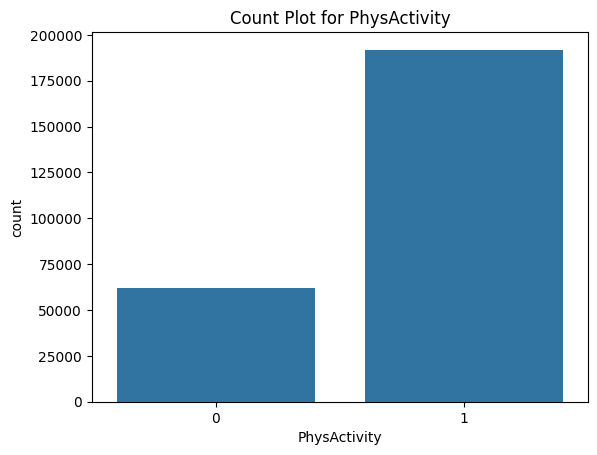


Column: Sex
Sex
0    128715
1    100759
Name: count, dtype: int64


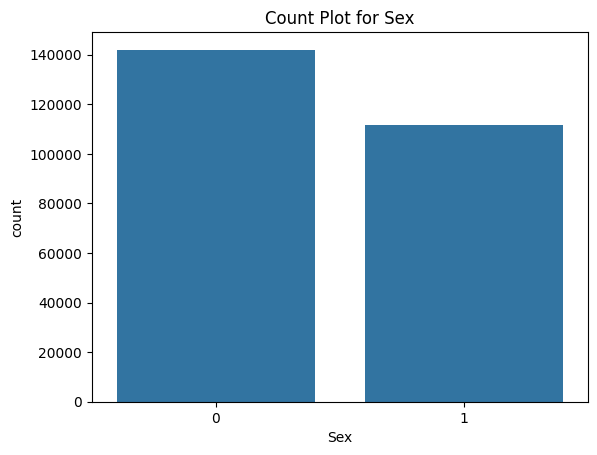


Column: Smoker
Smoker
0    122585
1    106889
Name: count, dtype: int64


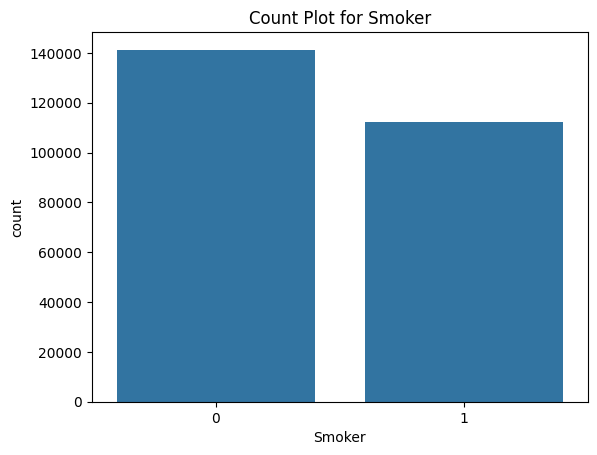


Column: Stroke
Stroke
0    219190
1     10284
Name: count, dtype: int64


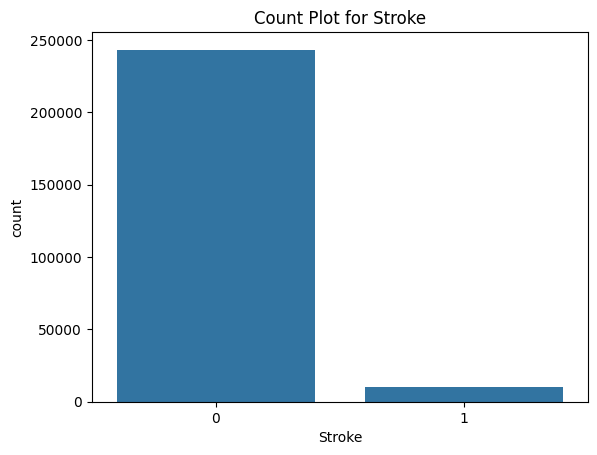


Column: Veggies
Veggies
1    182337
0     47137
Name: count, dtype: int64


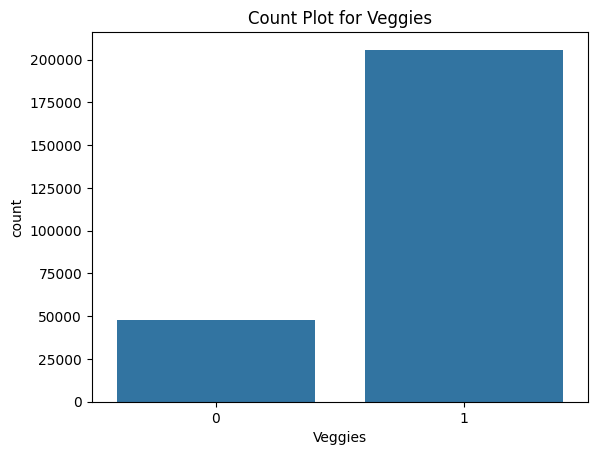

In [18]:
# Value distribution for binary/categorical columns

for col in binary_cols:
    print(f"\nColumn: {col}")
    print(df_cleaned[col].value_counts(dropna=False))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.show()

**Individual boxplots for numerical variables**


Box plot for: BMI


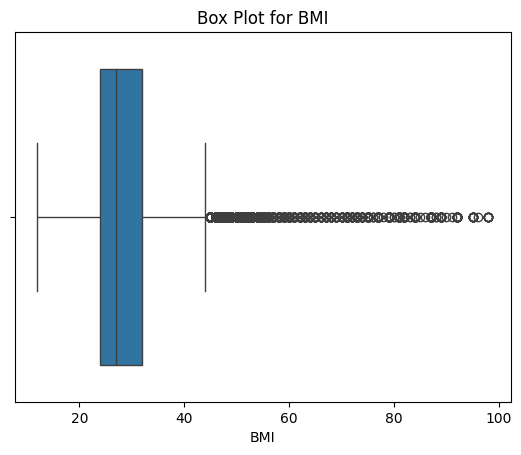


Box plot for: GenHlth


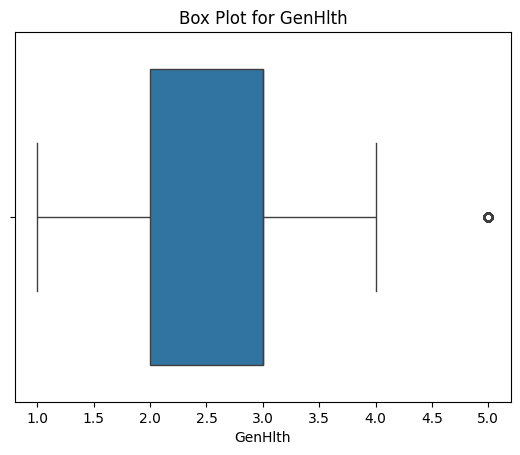


Box plot for: MentHlth


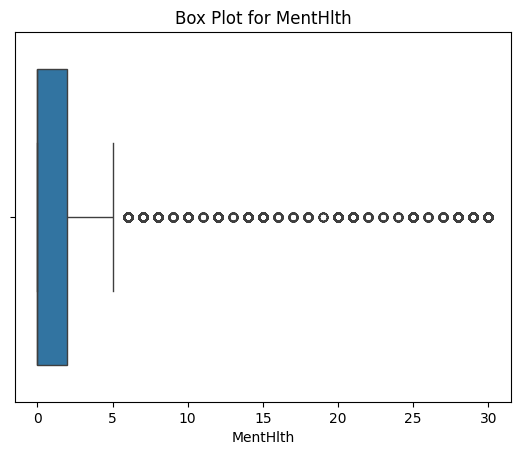


Box plot for: PhysHlth


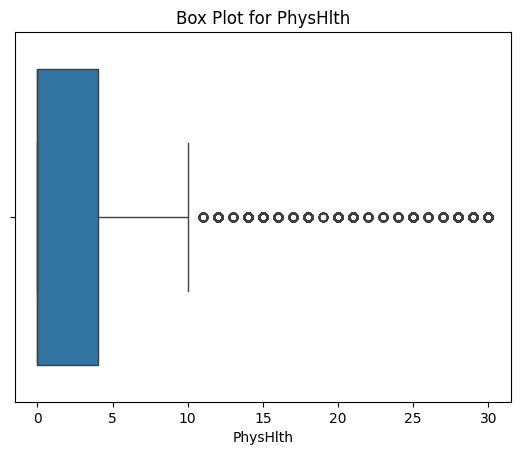


Box plot for: Age


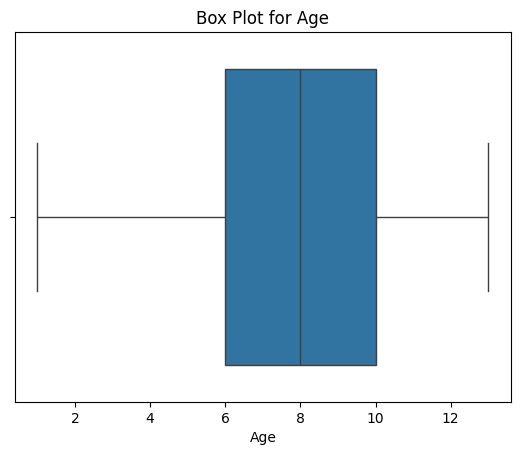


Box plot for: Education


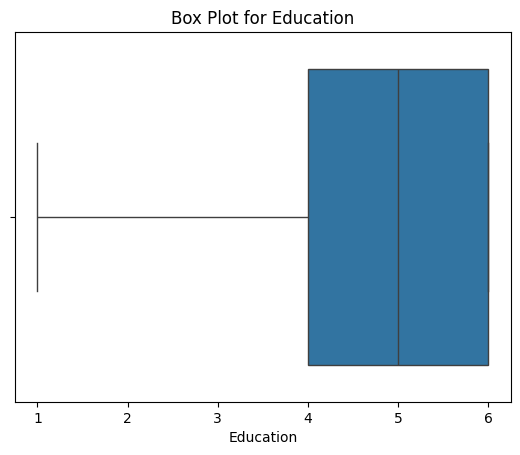


Box plot for: Income


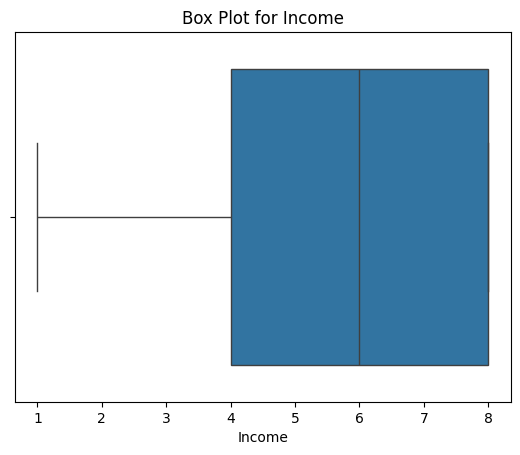

In [19]:
for col in numerical_cols:
    print(f"\nBox plot for: {col}")
    sns.boxplot(x=df_cleaned[col], orientation='h')  # horizontal boxplot
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

# **CORRELATION**

In [20]:
#Form the correlation matrix
corr_matrix = round(df_cleaned.corr(),2)
corr_matrix

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1.00,0.28,0.11,0.19,0.07,0.12,0.20,-0.10,-0.02,-0.04,...,0.00,0.27,0.04,0.14,0.21,0.05,0.34,-0.11,-0.14,0.25
HighChol,0.28,1.00,0.09,0.09,0.07,0.09,0.18,-0.06,-0.03,-0.03,...,0.00,0.19,0.05,0.11,0.14,0.02,0.26,-0.05,-0.06,0.19
CholCheck,0.11,0.09,1.00,0.04,-0.00,0.03,0.05,-0.00,0.02,-0.00,...,-0.05,0.06,-0.00,0.04,0.05,-0.02,0.10,-0.01,0.00,0.07
BMI,0.19,0.09,0.04,1.00,-0.01,0.01,0.04,-0.13,-0.07,-0.04,...,0.05,0.21,0.07,0.10,0.18,0.03,-0.05,-0.07,-0.07,0.21
Smoker,0.07,0.07,-0.00,-0.01,1.00,0.05,0.11,-0.07,-0.06,-0.01,...,0.04,0.13,0.08,0.10,0.11,0.10,0.11,-0.14,-0.10,0.05
Stroke,0.12,0.09,0.03,0.01,0.05,1.00,0.20,-0.06,-0.00,-0.03,...,0.03,0.17,0.06,0.14,0.17,0.00,0.13,-0.06,-0.12,0.10
HeartDiseaseorAttack,0.20,0.18,0.05,0.04,0.11,0.20,1.00,-0.07,-0.01,-0.03,...,0.02,0.25,0.05,0.17,0.20,0.09,0.22,-0.08,-0.12,0.17
PhysActivity,-0.10,-0.06,-0.00,-0.13,-0.07,-0.06,-0.07,1.00,0.13,0.14,...,-0.05,-0.24,-0.11,-0.20,-0.24,0.03,-0.09,0.17,0.17,-0.10
Fruits,-0.02,-0.03,0.02,-0.07,-0.06,-0.00,-0.01,0.13,1.00,0.24,...,-0.03,-0.07,-0.05,-0.02,-0.03,-0.09,0.07,0.08,0.05,-0.02
Veggies,-0.04,-0.03,-0.00,-0.04,-0.01,-0.03,-0.03,0.14,0.24,1.00,...,-0.02,-0.09,-0.04,-0.05,-0.06,-0.07,-0.00,0.13,0.13,-0.04


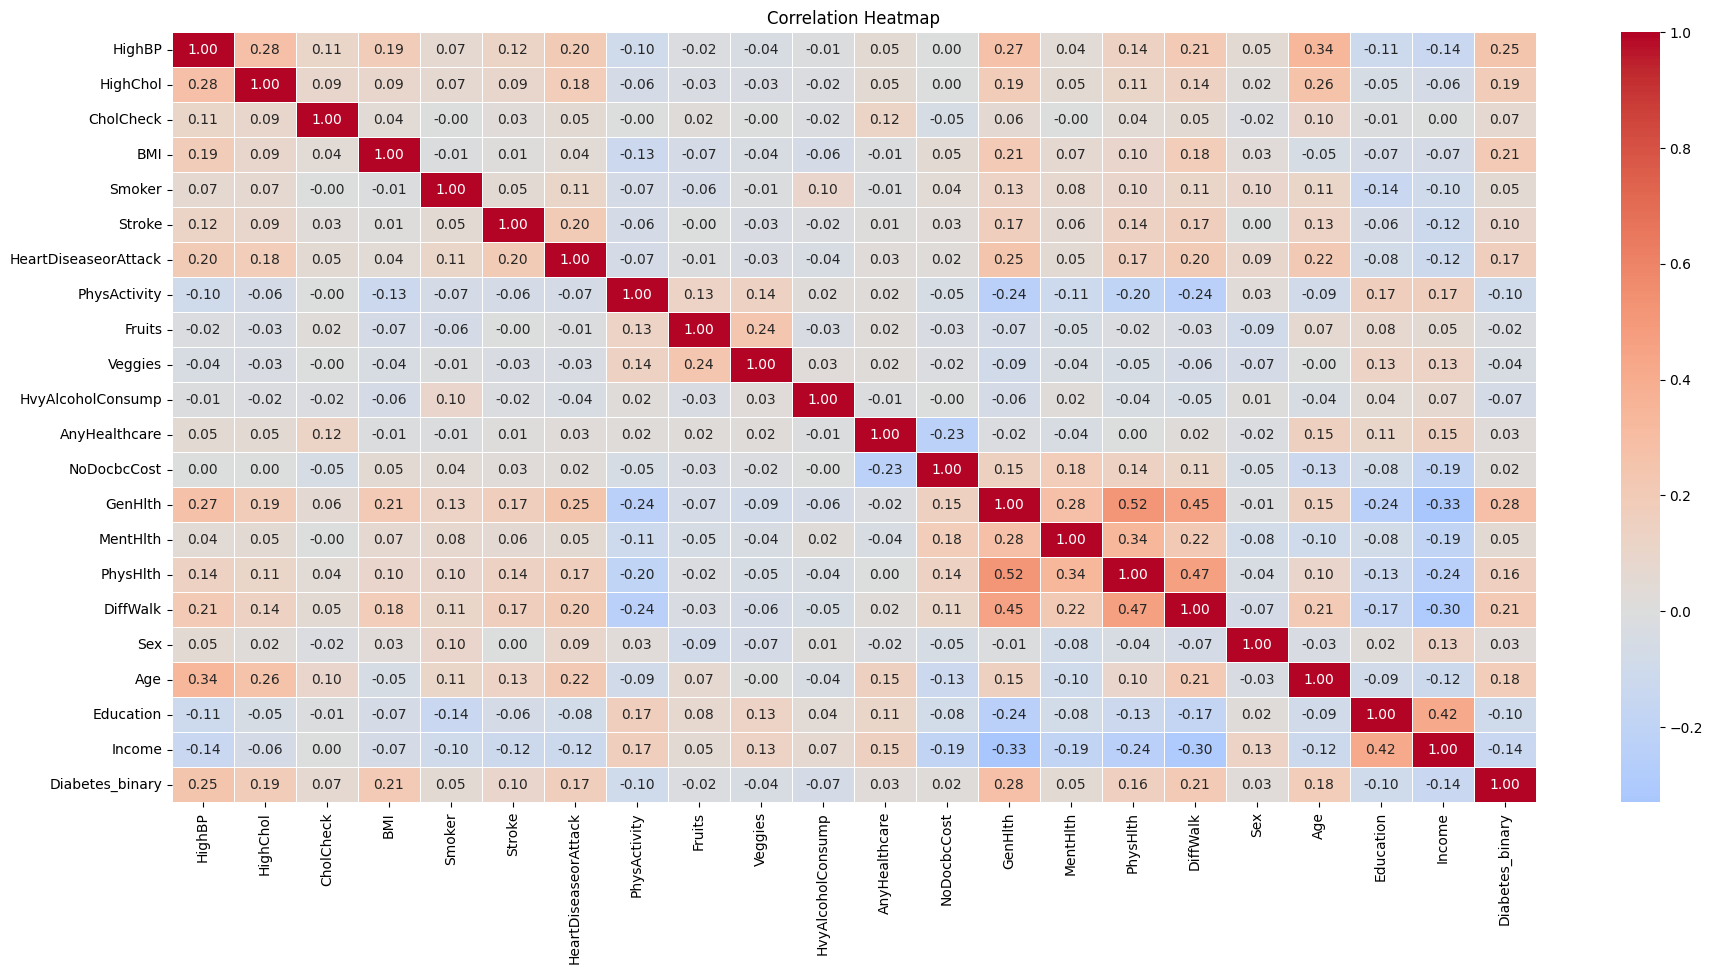

In [21]:
#Visualise correlation as a heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
# Correlation with target variable
target_corr = corr_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nCorrelation of features with 'Diabetes_binary':")
print(target_corr)


Correlation of features with 'Diabetes_binary':
Diabetes_binary         1.00
GenHlth                 0.28
HighBP                  0.25
DiffWalk                0.21
BMI                     0.21
HighChol                0.19
Age                     0.18
HeartDiseaseorAttack    0.17
PhysHlth                0.16
Stroke                  0.10
CholCheck               0.07
Smoker                  0.05
MentHlth                0.05
AnyHealthcare           0.03
Sex                     0.03
NoDocbcCost             0.02
Fruits                 -0.02
Veggies                -0.04
HvyAlcoholConsump      -0.07
PhysActivity           -0.10
Education              -0.10
Income                 -0.14
Name: Diabetes_binary, dtype: float64


# **Class Balance**

In [23]:
# y is the target series - Diabetes_binary

y.value_counts()               # raw counts
y.value_counts(normalize=True) # proportions

,proportion
Diabetes_binary,
0,0.860667
1,0.139333


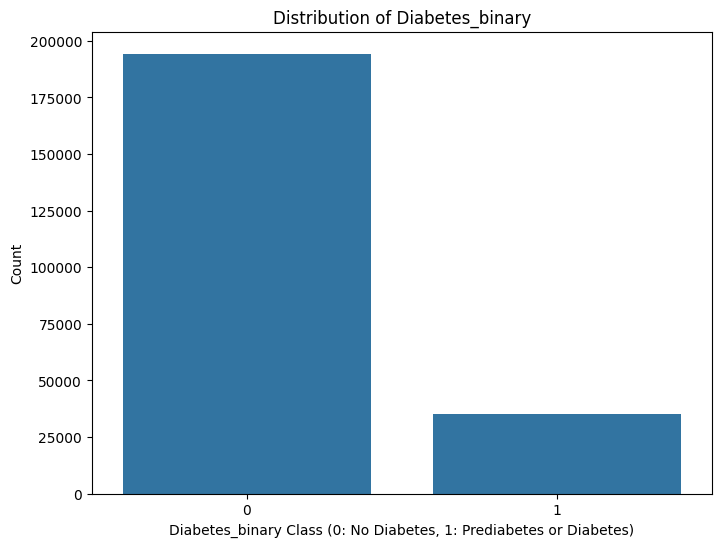

In [24]:
#Visualise distribution of target
class_counts = df_cleaned['Diabetes_binary'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary Class (0: No Diabetes, 1: Prediabetes or Diabetes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

**Conclusion on Class Balance**

We have class imbalance, with a disproportionate number falling in 'No Diabetes'

# **Feature selection**
We kept all 21 features because they are known risk factors for diabetes (domain expertise)
We did not drop any features.
BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.htm


# **Train-Test Split**

Total samples: **229474**

Training samples: **190260**

Testing samples: **63420**


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state = 42) #stratify = y to preserve balanced split between train and test in view of class imbalance

In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (202944, 21)
X_test shape: (50736, 21)
y_train shape: (202944, 1)
y_test shape: (50736, 1)


#**Models selected and Rationale**


##1.   Logistic Regression
*   Its a baseline linear classifier (simple starting point before trying others)
*   Easy to interpret (coef. that tell how strogly features affect target)
*   Good with clean data (but struggles with nonlinear patterns)

##2.   K-Nearest Neighbors (KNeighborsClassifier)
*   KNN is a non-parametric method that can capture local patterns (classification depends on how nearby points look like)
*   Handles nonlinear class boundaries (i.e relationship between features and diabetes status not linear )


##3.   Naive Bayes (MultinomialNB)
*   Naive Bayes is a probabilistic model that gives the probability estimates of class membership
*   Works well with many features
*   MultinomialNB because good for categorical/continuous features, unlike BernoulliNB (for Binary feature), GaussianNB (for normally distributed)

##4.   Neural Network (MLPClassifier)
*  Learns complex nonlinear relationships between inputs and outputs (we have nonlinear relationships)
*  Works well with multiple inputs (like our dataset)
*  Can capture interactions among variables that simpler models may miss
*  Works on classification problems like ours
*  Works with many features, and big datasets



In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

#**Build and fit Pipelines**

Since the our data is all int64 and has no missing values, preprocessing is minimal (only scaling is needed for some models)

In [29]:
#Address class imbalance with SMOTE (Synthetic Minority Over-sampling Technique) for improved model performance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# check new class distribution with valies count
y_train_balanced.iloc[:, 0].value_counts() #since y_train_balanced is a serie, ".iloc[:, 0]" selects all rows (:) from the first column (0) of the DataFrame

,count
Diabetes_binary,
0,174667
1,174667


This result shows how many samples of each class exist in our balanced training set. The result show that SMOTE successfully oversampled the minority class (1 = diabetic) to match the number of majority class instances (0 = non-diabetic), giving us a perfectly balanced dataset.

In [30]:
# Define models
# For model improvement use weights for Logistic Regression and MLP
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
}

# Pipelines (with scaler where needed)
pipelines = {
    "Logistic Regression": Pipeline([("scaler", StandardScaler()), ("model", models["Logistic Regression"])]),
    "KNN": Pipeline([("scaler", StandardScaler()), ("model", models["KNN"])]),
    "Naive Bayes": Pipeline([("model", models["Naive Bayes"])]),  # Naive Bayes doesn't need scaling
    "MLP Neural Network": Pipeline([("scaler", StandardScaler()), ("model", models["MLP Neural Network"])])
}



#**Pipeline fit on training data and model evaluation**


 Training: Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.73      0.82     43667
           1       0.29      0.69      0.41      7069

    accuracy                           0.72     50736
   macro avg       0.61      0.71      0.61     50736
weighted avg       0.84      0.72      0.76     50736



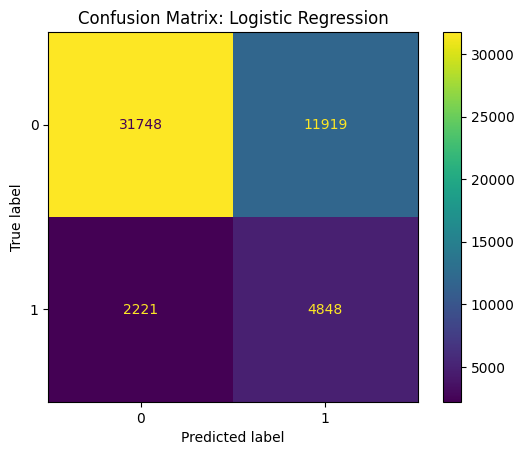


 Training: KNN


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#for improvement use X_train_balanced, y_train_balanced to fit models instead of the original X_train, y_train.

results = {}
for name, pipe in pipelines.items():
    print(f"\n Training: {name}")
    pipe.fit(X_train_balanced, y_train_balanced)
    y_pred = pipe.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    # Save metrics
    results[name] = {
        'Accuracy': pipe.score(X_test, y_test),
        'Precision': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
    }

#**Summary of all model results**

In [ ]:
summary_df = pd.DataFrame(results).T
print("\n Model Comparison Table:")
display(summary_df)

In [ ]:
print("\n Best Model:")
best_model = summary_df['F1-score'].idxmax()
print(f"{best_model} performed the best based on F1-score.")

#**Main Challenge**
Even after adressing class imbalance with SMOTE, models are still failing to adequately detect diabetic cases. Next, we perform hyperparameter tuning and threshold tuning.

#**FURTHER IMPROVEMENTS - class weights, hyperparameter and threshold tuning**

1.   SMOTE-aware pipelines for class balance
2.   Applied class weights on Logistic Regression (applicable only here)
3.   Hyperparameter tuning for all except Naive Bayes
4.   Threshold tuning (This does not change training, only how predictions are interpreted at test time + can only be done on original sample not the rebalanced with SMOTE)

*   Step 1: Identify models that support threshold tuning (i.e., they support .predict_proba() or .decision_function()): all our models do.
*   Step 2: Modify evaluation loop to:

    Use predict_proba()

    Tune threshold using F1-score

    Print classification report and plot confusion matrix using the best threshold



In [ ]:
#Full pipeline for all four models with:
#SMOTE-aware pipelines
#Scaling where needed
#GridSearchCV with relevant hyperparameters
#Threshold tuning using predict_proba
#Final performance report & comparison table





from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Step 1: Full Pipeline Setup with SMOTE

# --- 1. Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "MLP Neural Network": MLPClassifier(max_iter=1000)
}

# --- 2. Define SMOTE-aware pipelines.
"""
#SMOTE is applied within cross-validation, only on training folds, so no data leakage.
#Scaling and SMOTE are applied in correct order inside each fold and reusable.
#Cleaner and safer for tuning + evaluation workflows.
"""
pipelines = {
    "Logistic Regression": ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("model", models["Logistic Regression"])
    ]),
    "KNN": ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("model", models["KNN"])
    ]),
    "Naive Bayes": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("model", models["Naive Bayes"])
    ]),
    "MLP Neural Network": ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("model", models["MLP Neural Network"])
    ])
}

#Step 2: Hyperparameter Tuning with GridSearchCV

# --- 3. Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l1", "l2"],
        "model__solver": ["liblinear"]
    },
    "KNN": {
        "model__n_neighbors": [3, 5],
        "model__weights": ["uniform"]
    },
    "Naive Bayes": {},  # No hyperparameters
    "MLP Neural Network": {
        "model__hidden_layer_sizes": [(50, 50)],
        "model__activation": ["relu"],
        "model__alpha": [0.001]
    }
}

# --- 4. GridSearchCV for each model
best_models = {}

for name in pipelines:
    print(f"\n Tuning: {name}")
    grid = GridSearchCV(
        estimator=pipelines[name],
        param_grid=param_grids[name],
        scoring='f1',
        cv=3,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print("Best Params:", grid.best_params_)


#Step 3: Threshold Tuning + Final Evaluation

# --- 5. Threshold tuning + evaluation
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

results = {}

for name, model in best_models.items():
    print(f"\n Evaluating: {name}")

    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]

    # Threshold tuning
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_threshold = thresholds[np.argmax(f1_scores)]

    y_pred = (y_proba >= best_threshold).astype(int)

    # Report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plot_conf_matrix(y_test, y_pred, name)

    # Save metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Best Threshold': best_threshold
    }




In [ ]:
#Summary Table

# improved model comparison table
results_df = pd.DataFrame(results).T
print("\n Model Comparison:\n")
print(results_df[["Accuracy", "Precision", "Recall", "F1-score"]].round(4))



In [ ]:
print("\n Best Model:")
best_model = results_df['F1-score'].idxmax()
print(f"{best_model} performed the best based on F1-score.")

#**FURTHER IMPROVEMENTS - add ensemble models and PCA(to pipelines)**


**Add alternative Algorithms / Ensemble models**

Ensemble Models: Try Random Forest or Gradient Boosting (e.g., XGBoost, LightGBM) with class_weight='balanced' or custom weight. or StackingClassifier — combines strengths of your tuned models

**Add PCA to Pipeline**

Use PCA only for models sensitive to high-dimensionality (Only Logistic Regression, KNN, and Neural Nets in our case)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "MLP Neural Network": MLPClassifier(max_iter=300),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define pipelines
pipelines = {
    "Logistic Regression": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("model", models["Logistic Regression"])
    ]),
    "KNN": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("model", models["KNN"])
    ]),
    "Naive Bayes": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("model", models["Naive Bayes"])
    ]),
    "MLP Neural Network": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("model", models["MLP Neural Network"])
    ]),
    "Random Forest": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("model", models["Random Forest"])
    ]),
    "XGBoost": ImbPipeline([
        ("smote", SMOTE(random_state=42)),
        ("model", models["XGBoost"])
    ])
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l1", "l2"],
        "model__solver": ["liblinear"]          # fastest solver for small grids
    },
    "KNN": {
        "model__n_neighbors": [3, 5],           # trimmed
        "model__weights": ["uniform"]           # single option → faster
    },
    "Naive Bayes": {},                          # still nothing to tune
    "MLP Neural Network": {
        "model__hidden_layer_sizes": [(50, 50)],# one compact topology
        "model__activation": ["relu"],
        "model__alpha": [0.001]                 # modest regularization
    },
    "Random Forest": {
        "model__n_estimators": [100],           # single forest size
        "model__max_depth": [None, 10],         # two depth choices
        "model__class_weight": ["balanced"]     # handle imbalance, 1 option
    },
    "XGBoost": {
        "model__n_estimators": [100],           # small tree ensemble
        "model__max_depth": [3],                # shallow trees = fast
        "model__learning_rate": [0.1],          # standard LR
        "model__scale_pos_weight": [1]          # no imbalance weighting (you can set >1 if needed)
    }
}

# Run evaluation for each model
results = {}

for name, pipeline in pipelines.items():
    print(f"\nTraining: {name}")

    grid = GridSearchCV(pipeline, param_grids.get(name, {}), scoring='recall', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    # Predict probabilities + threshold tuning
    y_proba = grid.predict_proba(X_test)[:, 1]
    threshold = 0.5  # Optional: tune later
    y_pred = (y_proba >= threshold).astype(int)

    # Classification report + confusion matrix
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    # Save metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": grid.score(X_test, y_test),
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"]
    }



In [ ]:
# Display results
results_df = pd.DataFrame(results).T.sort_values(by="F1-score", ascending=False)
print("\n=== Final Model Performance Table ===")
print(results_df)

In [ ]:
print("\n Best Model:")
best_model = results_df['F1-score'].idxmax()
print(f"{best_model} performed the best based on F1-score.")

#**Overall observations / Wrap-up**
Ensemble models added performed better than our original models with the best F1 scores. The best ensamble model (Random forest) is our final model of choice since it is the best at balancing correctly identified diabetic cases (recall) and avoiding false alarms (precision).

The application of PCA with 95% variance retention resulted in reduced F1-scores across all models compared to their performance without PCA.

All features seem to have important discriminative information that are important for distinguishing between diabetic and non-diabetic. Hence Models perform better with all the 21 features.
